#LAB 9 : Dimensionality Reduction

  1. Principal Component Analysis (PCA)
  2. Linear Discriminant Analysis (LDA)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 7)

#PCA

Text(0.5, 1.0, 'distribution in y direction')

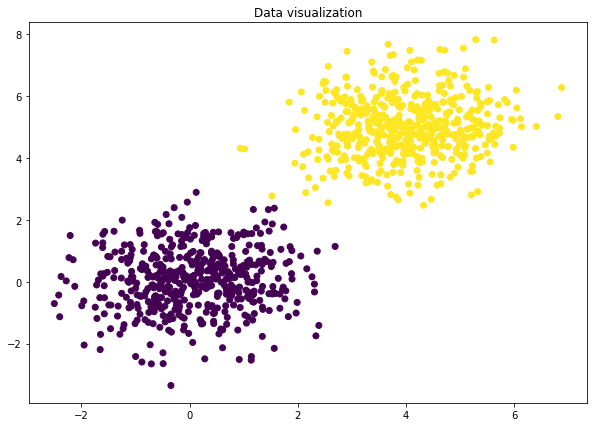

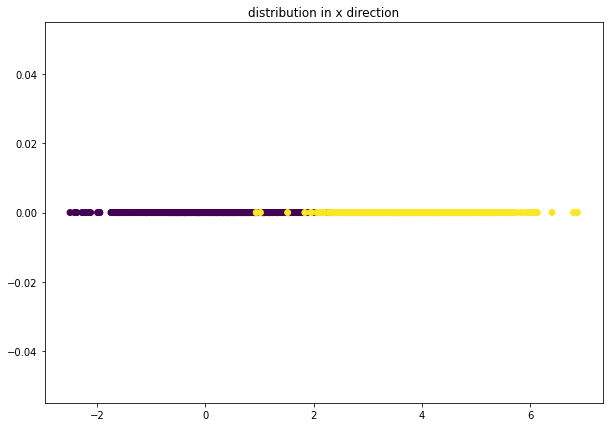

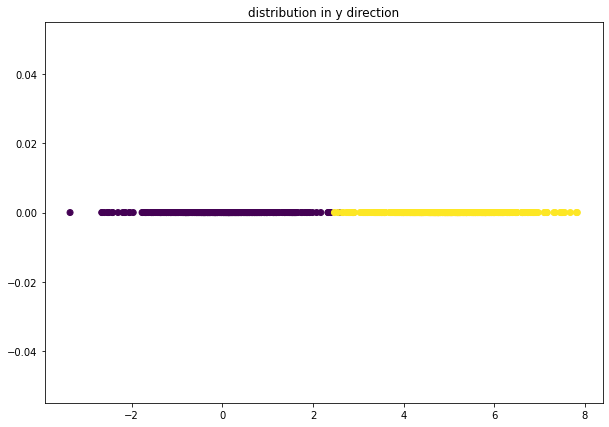

In [50]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

Text(0.5, 1.0, 'Data visualization')

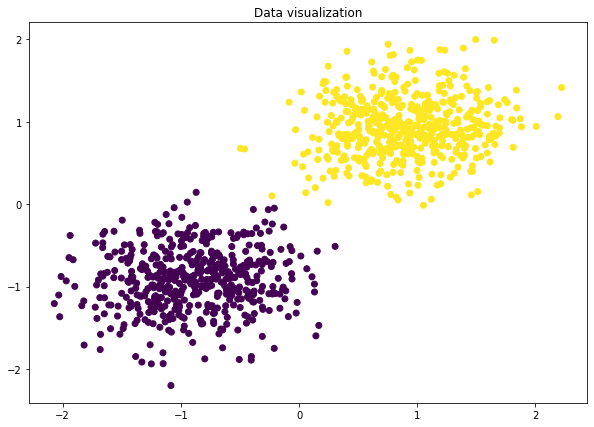

In [51]:
# Data normalization

# Perform data normalization here using mean substraction and std division
## Write your code here

mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
mean, std

data = (data-mean)/std

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')



(1000, 2)
(2, 2)
(2, 2) (2,) (2, 2)
variance along pca1 direction= 1.8477663843459724
variance along pca2 direction= 0.152233615654027


Text(0.5, 1.0, 'distribution in pca2 direction')

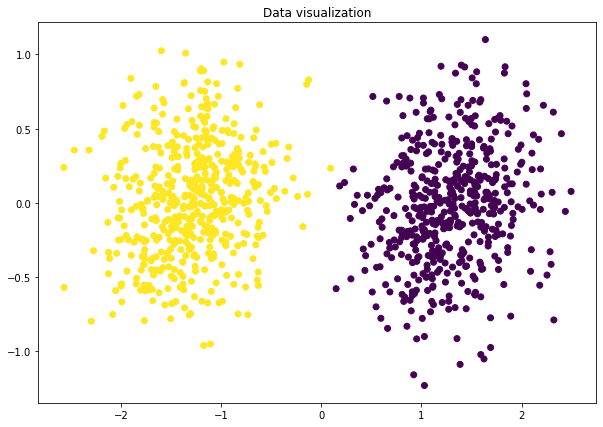

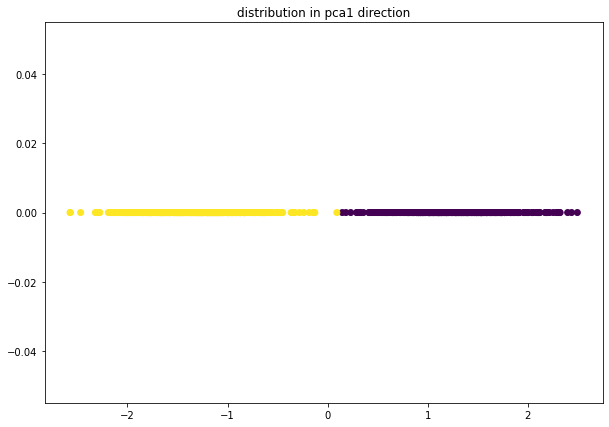

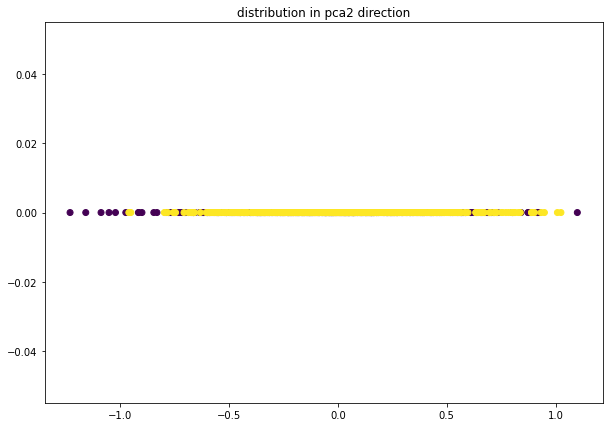

In [52]:
# PCA

# coverance matrix
print(data.shape)
cov=data.T @ data

print(cov.shape)


# using sigular value decomposition
u, s, v=np.linalg.svd(cov)

print(u.shape, s.shape, v.shape)

trans_data= data @ u ## Write your code here

var_pca1=np.var(trans_data[:,0])
var_pca2=np.var(trans_data[:,1])

print('variance along pca1 direction=',var_pca1)
print('variance along pca2 direction=',var_pca2)


plt.figure()
plt.scatter(trans_data[:,0],trans_data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(trans_data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca1 direction')
plt.figure()
plt.scatter(trans_data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in pca2 direction')

In [53]:
class pca:
  # Constructor
  def __init__(self, name='reg',data=None,retain_dim=None):
    self.name = name  # Create an instance variable
    self.data=data
    self.retain_dim=retain_dim if retain_dim is not None else self.ret_dim(self.data)
    # compute pca transform value
    
  def pca_comp(self,data):
    data = self.pre_process(data)
    cov = data.T @ data        ## Write your code here
    u,_,_ = np.linalg.svd(cov) # singular value decomposition
    u_req = u[:, :self.retain_dim] ## Write your code here
    trans_data= data @ u_req ## Write your code here
    return trans_data, u_req
    # compute the required retain dimension
    
  def ret_dim(self,data):
    data=self.pre_process(data)
    cov=data.T @ data
    _,s,_=np.linalg.svd(cov)
    ind = np.where(np.cumsum(s) >= 0.9*np.sum(s))[0][0] ## Write your code here
    return ind+1
  def pre_process(self,data):
    data1=(data-np.mean(data,axis=0))
    
    data=data1/(np.std(data1,axis=0)+10**(-30)) # avoid divide by zero
    return data

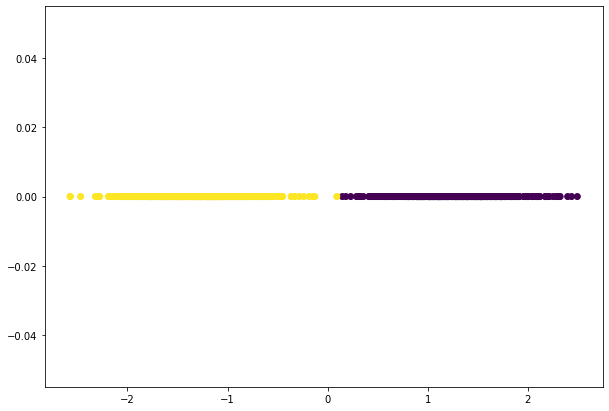

In [54]:
# pca transformation
PCA = pca(data=data)
trans_data,trans_mat=PCA.pca_comp(data)
plt.scatter(trans_data,np.zeros(trans_data.shape),c=label)

In [55]:
#classification using pca
#use k-nearest neighbour classifier after dimensionality reduction

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data,label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

print('KNN Testing accuracy =',knn.score(PCA.pre_process(data) @ trans_mat,tst_label)*100)


KNN Training accuracy = 99.9
KNN Testing accuracy = 100.0


##PCA on MNIST

In [56]:
!pip install idx2numpy

(100, 784)
(100,)


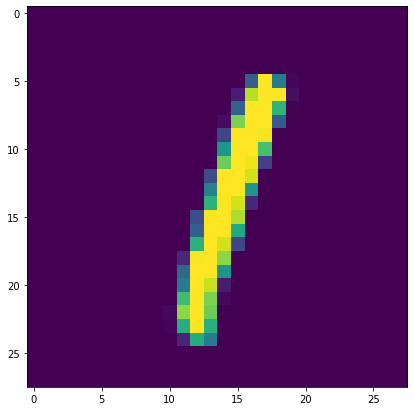

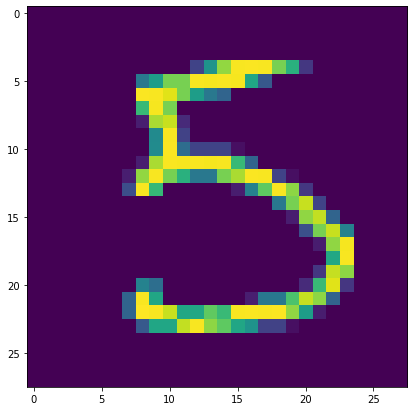

In [57]:
# MNIST data

file1='./t10k-images-idx3-ubyte' ## Change the path accordingly
file2='./t10k-labels-idx1-ubyte' ## Change the path accordingly

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

cl=[1,5]

# for class 1

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5]
lab_5=labels[id5]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5))
print(G_lab.shape)

data = data.astype('float32')

Initial data dimension= 784
Retained dimesion after PCA= 34
KNN Training accuracy = 96.0
(50, 28, 28)
KNN Testing accuracy = 98.0


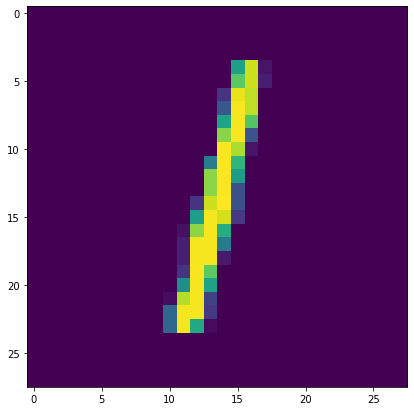

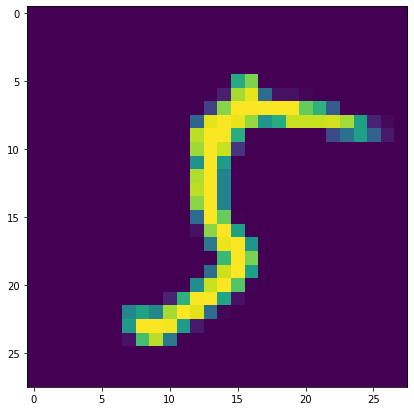

In [58]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)
data = PCA.pre_process(data)

trans_data, trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5]
lab_5=labels[id5]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat, tst_lab)*100)


**Perform PCA on MNIST and Classify taking the data with any 3 Classes**

(150, 784)
(150,)


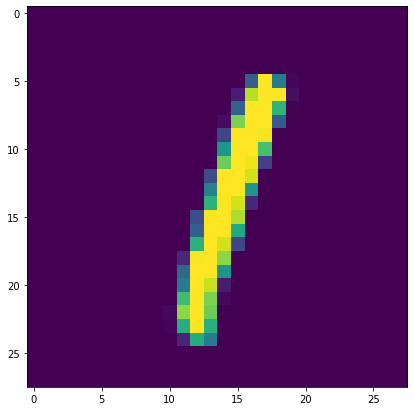

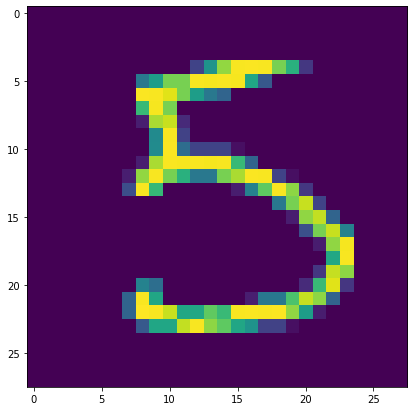

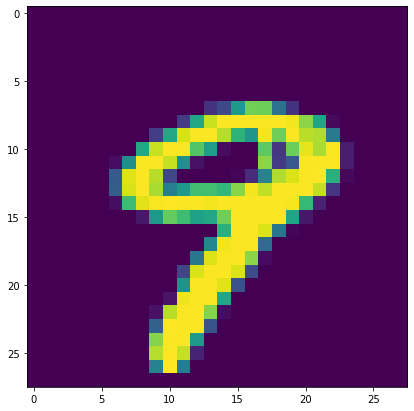

In [59]:
## Write your code here
cl = [1, 5, 9]

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5]
lab_5=labels[id5]

id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[:50]
Im_9=Images[id9]
lab_9=labels[id9]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])
plt.figure()
plt.imshow(Im_9[1])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5,Im_9))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5,lab_9))
print(G_lab.shape)

data = data.astype('float32')

Initial data dimension= 784
Retained dimesion after PCA= 50
KNN Training accuracy = 94.66666666666667
(50, 28, 28)
KNN Testing accuracy = 90.66666666666666


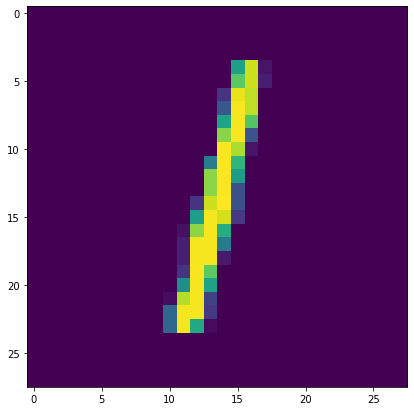

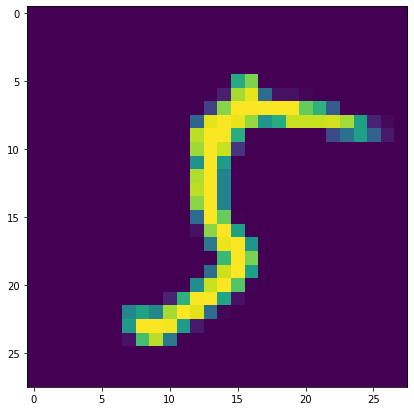

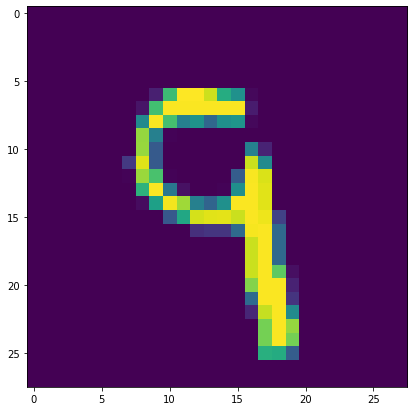

In [60]:
print('Initial data dimension=',data.shape[1])
PCA=pca(data=data)
data = PCA.pre_process(data)

trans_data, trans_mat=PCA.pca_comp(data)
print('Retained dimesion after PCA=',trans_mat.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5]
lab_5=labels[id5]

# for class 9
id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[100:150]
Im_9=Images[id9]
lab_9=labels[id9]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])
plt.figure()
plt.imshow(Im_9[1])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_9))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5,lab_9))


# final testing
print('KNN Testing accuracy =',knn.score(PCA.pre_process(data_tst) @ trans_mat, tst_lab)*100)


#LDA

Text(0.5, 1.0, 'distribution in y direction')

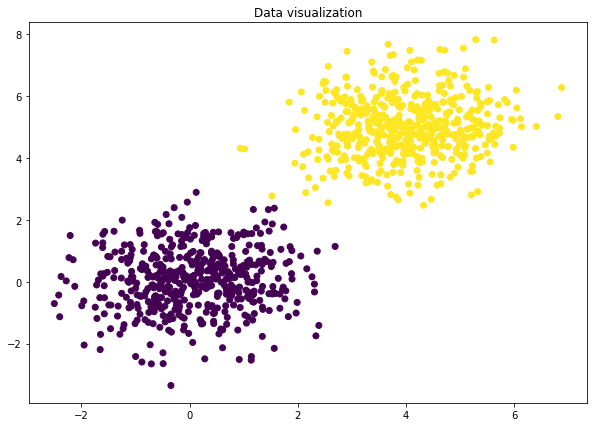

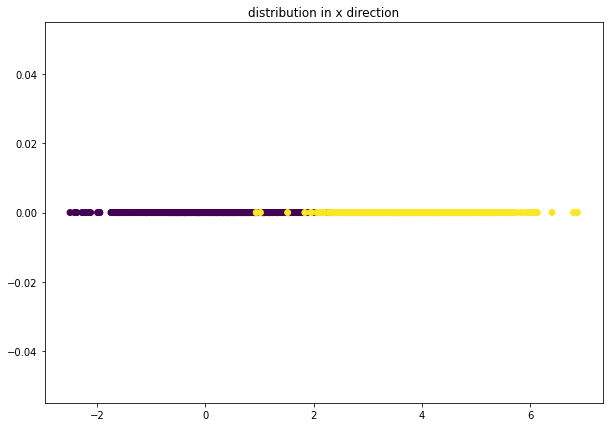

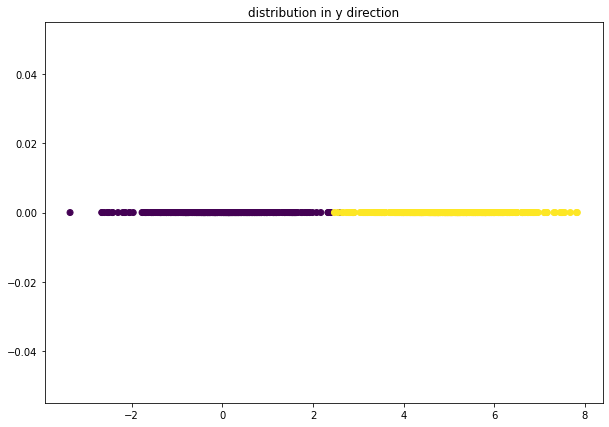

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# data generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')

In [177]:
# perform 2-class and m-class LDA
def LDA(data,label):  
  id={}
  data_l={}
  mean_l={}
  cov_l={}
  S_w=np.zeros((data.shape[1],data.shape[1]))


  cls=np.unique(label)
  for i in cls:
    id[i]=np.where(label==i)[0]
    data_l[i]=data[id[i],:]
    mean_l[i]=np.mean(data_l[i],axis=0)
    cov_l[i]= ((data_l[i] - mean_l[i]).T @ (data_l[i] - mean_l[i])) / (data_l[i].shape[0] - 1) ## Write your code here
    S_w=S_w+cov_l[i]


  S_w=S_w/len(data_l)
  print("S_w Shape:", S_w.shape)

  if len(data_l)==2:
    print("mean Shape:", mean_l[1].shape)
    S_b= (mean_l[1] - mean_l[0]).T @ (mean_l[1] - mean_l[0]) ## Write your code here
    print("S_b Shape:", S_b.shape)
    w = np.linalg.pinv(S_w) @ (mean_l[1] - mean_l[0]).T ## Write your code here

  else:
    S_t = np.cov(data,rowvar=False)
    print("S_t Shape:", S_t.shape)
    S_b = S_t - S_w ## Write your code here
    u,s,_= np.linalg.svd(np.linalg.pinv(S_w) @ S_b) ## Write your code here
    print("u Shape:", u.shape)
    print(s)
    max_index = max(len(data_l)-1, int(u.shape[1]*0.2))
    w=u[:, :max_index]
  
  print("w Shape:", w.shape)

  return w




S_w Shape: (2, 2)
mean Shape: (2,)
S_b Shape: ()
w Shape: (2,)
(1000, 2) (1000,)


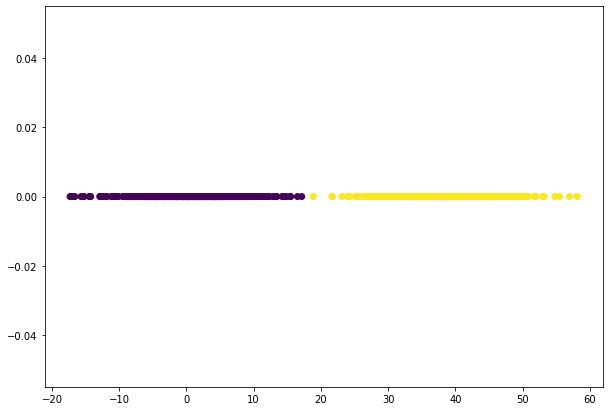

In [178]:
# after LDA projection

w = LDA(data, label)
print(data.shape, label.shape)
plt.figure()
plt.scatter(data @ w, np.zeros(data.shape[0]),c=label)


In [179]:
# Classification using :LDA
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
trans_data = (data @ w).reshape((-1, 1))

knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data, label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

trans_data = (data @ w).reshape((-1, 1))

print('KNN Testing accuracy =',knn.score(trans_data, tst_label)*100)


KNN Training accuracy = 100.0
KNN Testing accuracy = 100.0


##LDA Multiclass

Text(0.5, 1.0, 'distribution in y direction')

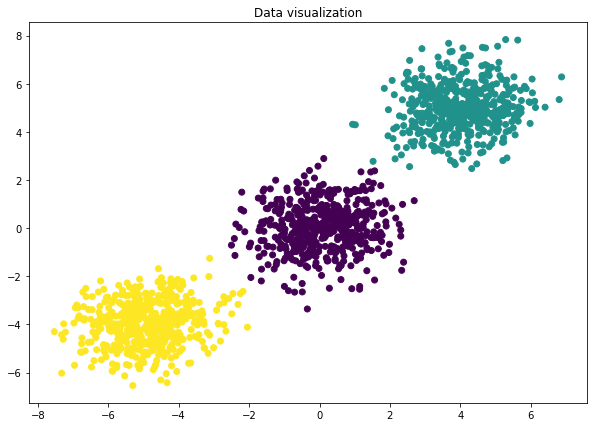

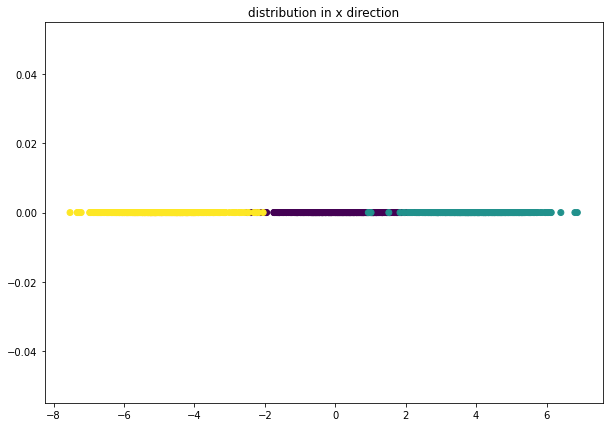

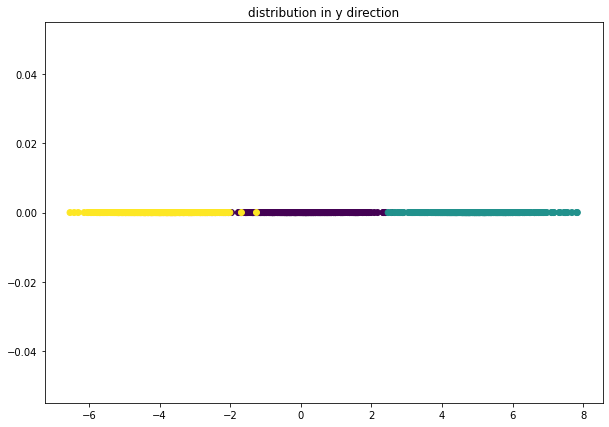

In [180]:
mean1=np.array([0,0])
mean2=np.array([4,5])
mean3=np.array([-5,-4])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data3=np.random.multivariate_normal(mean3,var,500)
data=np.concatenate((data1,data2,data3))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0]),np.ones(data3.shape[0])+1))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')
plt.figure()
plt.scatter(data[:,0],np.zeros(data.shape[0]),c=label)
plt.title('distribution in x direction')
plt.figure()
plt.scatter(data[:,1],np.zeros(data.shape[0]),c=label)
plt.title('distribution in y direction')


S_w Shape: (2, 2)
S_t Shape: (2, 2)
u Shape: (2, 2)
[25.44474058  0.13632272]
w Shape: (2, 2)
(2, 2)


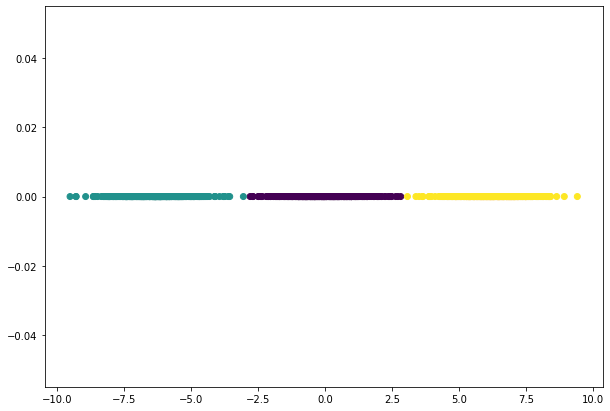

In [181]:
# after projection
w=LDA(data,label)
print(w.shape)
plt.figure()
plt.scatter(data @ w[:,0],np.zeros(data.shape[0]),c=label) # by performing 1D projection

In [182]:
# Testing (using KNN)
# Use k-nearest neighbour classifier (Scikit Learn) after dimensionality reduction

## Write your code here

from sklearn.neighbors import KNeighborsClassifier
k=5
knn = KNeighborsClassifier(n_neighbors=k)
trans_data = data @ w

knn.fit(trans_data, label)

print('KNN Training accuracy =',knn.score(trans_data, label)*100)

# test data
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
tst_label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

trans_data = data @ w

print('KNN Testing accuracy =',knn.score(trans_data, tst_label)*100)


KNN Training accuracy = 99.93333333333332
KNN Testing accuracy = 100.0


**Perform LDA on MNIST and Classify using the data of any 3 classes**

(150, 784)
(150,)


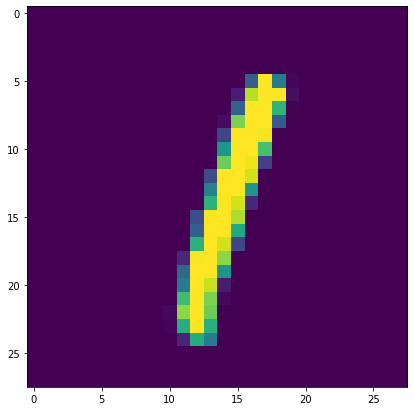

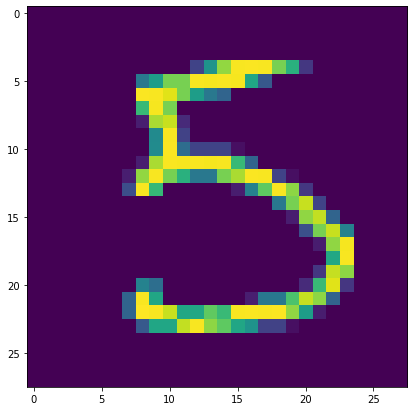

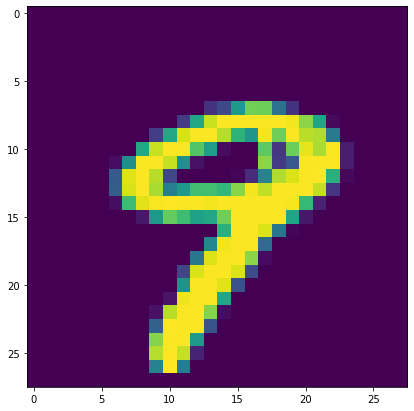

In [183]:
## Write your code here
cl = [1, 5, 9]

id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[:50]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[:50]
Im_5=Images[id5]
lab_5=labels[id5]

id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[:50]
Im_9=Images[id9]
lab_9=labels[id9]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])
plt.figure()
plt.imshow(Im_9[1])

#print(Im_5.shape)

data=np.concatenate((Im_1,Im_5,Im_9))
data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
print(data.shape)
G_lab=np.concatenate((lab_1,lab_5,lab_9))
print(G_lab.shape)

data = data.astype('float32')

Initial data dimension= 784
S_w Shape: (784, 784)
S_t Shape: (784, 784)
u Shape: (784, 784)
[1.46050290e+10 5.34680679e+09 2.24347056e+03 6.75006455e+02
 4.34327414e+02 2.86929102e+02 2.19858780e+02 1.49953942e+02
 9.89413888e+01 8.25454711e+01 5.75857866e+01 5.03469018e+01
 4.33379733e+01 3.84586094e+01 3.13796519e+01 2.95175218e+01
 2.75203697e+01 2.55127917e+01 2.42411898e+01 2.12988629e+01
 1.98217655e+01 1.85170929e+01 1.64743726e+01 1.50146611e+01
 1.44561260e+01 1.39497350e+01 1.31461480e+01 1.21373600e+01
 1.14867511e+01 1.08950899e+01 1.03220136e+01 9.88573378e+00
 9.24290521e+00 8.93920063e+00 8.69936247e+00 8.24120616e+00
 7.93800801e+00 7.35709688e+00 7.14681889e+00 6.88867370e+00
 6.52186669e+00 6.31452610e+00 6.05385207e+00 5.91487317e+00
 5.65459379e+00 5.44898901e+00 5.29487796e+00 5.00564498e+00
 4.73157480e+00 4.64250044e+00 4.60733667e+00 4.42000696e+00
 4.35240259e+00 4.13711440e+00 4.08327399e+00 4.02886507e+00
 3.95915708e+00 3.78073565e+00 3.66811758e+00 3.622060

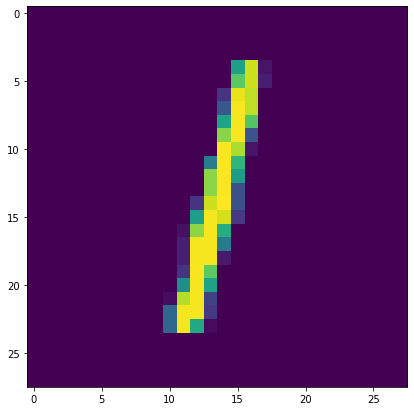

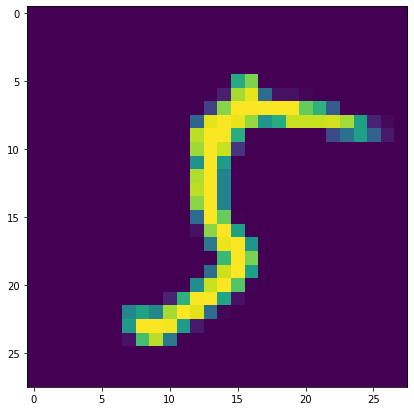

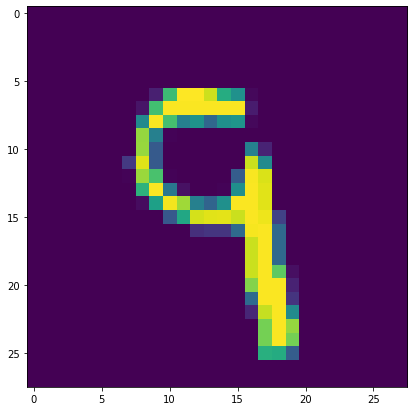

In [184]:
print('Initial data dimension=',data.shape[1])
w = LDA(data, G_lab)

trans_data = data @ w
print('Retained dimesion after LDA=',trans_data.shape[1])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(trans_data, G_lab)

print('KNN Training accuracy =',knn.score(trans_data,G_lab)*100)


## testing
## data preparation
id_1=np.where(labels==cl[0])
id1=id_1[0]
id1=id1[100:150]
Im_1=Images[id1]
lab_1=labels[id1]

# for class 5
id_5=np.where(labels==cl[1])
id5=id_5[0]
id5=id5[100:150]
Im_5=Images[id5]
lab_5=labels[id5]

# for class 9
id_9=np.where(labels==cl[2])
id9=id_9[0]
id9=id9[100:150]
Im_9=Images[id9]
lab_9=labels[id9]

plt.imshow(Im_1[1])
plt.figure()
plt.imshow(Im_5[1])
plt.figure()
plt.imshow(Im_9[1])

print(Im_5.shape)

data_tst=np.concatenate((Im_1,Im_5,Im_9))
data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))

tst_lab=np.concatenate((lab_1,lab_5,lab_9))


# final testing
print('KNN Testing accuracy =', knn.score(data_tst @ w, tst_lab)*100)